# About Customer Churn
Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.

It's hard to measure success if you don't measure the inevitable failures, too. While you strive for 100% of customers to stick with your company, that's simply unrealistic. That's where customer churn comes in.

Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. You can calculate churn rate by dividing the number of customers you lost during that time period -- say a quarter -- by the number of customers you had at the beginning of that time period.

For example, if you start your quarter with 400 customers and end with 380, your churn rate is 5% because you lost 5% of your customers.

# 3 Ways to Reduce Customer Churn

## 1. Focus your attention on your best customers.
Rather than simply focusing on offering incentives to customers who are considering churning, it could be even more beneficial to pool your resources into your loyal, profitable customers.

## 2. Analyze churn as it occurs.
Use your churned customers as a means of understanding why customers are leaving. Analyze how and when churn occurs in a customer's lifetime with your company, and use that data to put into place preemptive measures.

## 3. Show your customers that you care.
Instead of waiting to connect with your customers until they reach out to you, try a more proactive approach. Communicate with them all the perks you offer and show them you care about their experience, and they'll be sure to stick around.


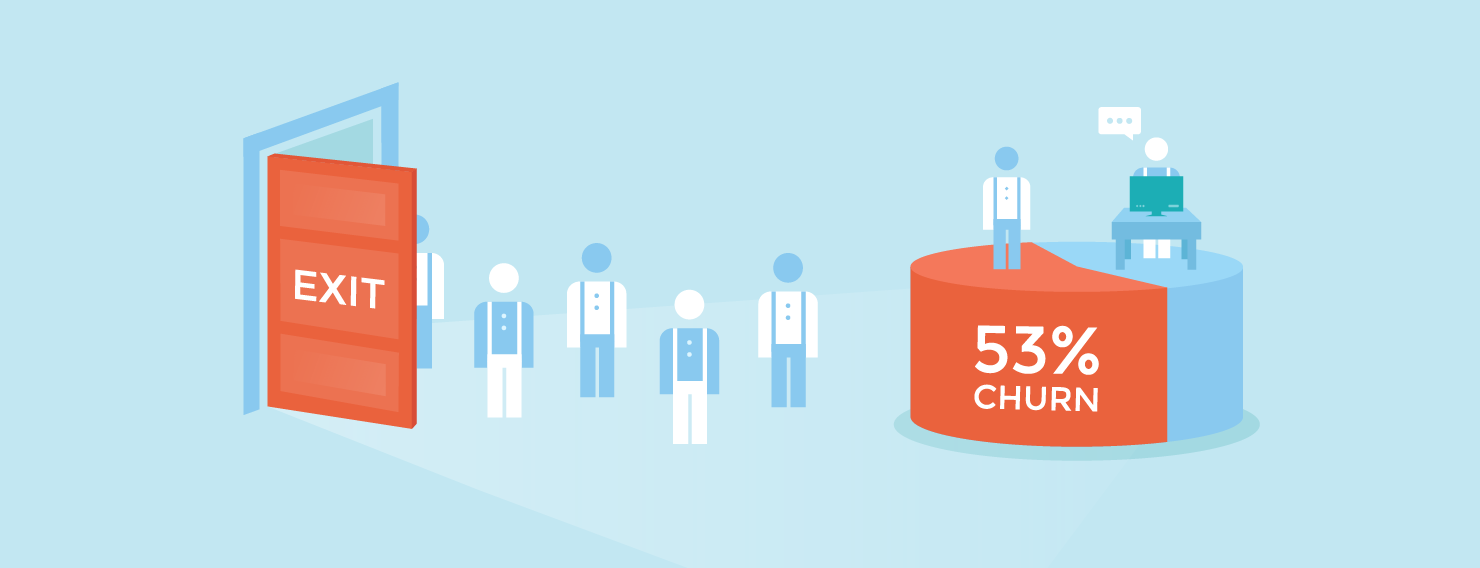

# Objective

The objective of the study is to analyse if the customer will take exit from services given from a telecom company based on certain parameters given.

# Steps to objective

###### 1. Load the test data
###### 2. Exploratory Data Analysis
    - Descriptive analysis
	- Data Visulaization and Data Insight
	- Handling missing and anomalies
	- Outliers detection
	- Encoding categorical columns
###### 3. Modeling
    - Train and Test dummy classifier for a base score
	- Compare various classification models using cross validation 
	- Data split in train and test
	- Apply the best score Algorithm
	- Hyper parameter tuning
###### 4. Model evaluation
    - accuracy score
	- f1 measure
	- ROC-AUC cure
###### 5. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
#%matplotlib notebook
from ipywidgets import *
#from ipywidgets import widgets, interactive
import seaborn as sns
from matplotlib.widgets import Button,Slider

## 1. Load the Data Set

In [2]:
df=pd.read_csv("churn-bigml-80.csv")
df_test=pd.read_csv("churn-bigml-20.csv")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [3]:
df_test.shape

(667, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
State                     2666 non-null object
Account length            2666 non-null int64
Area code                 2666 non-null int64
International plan        2666 non-null object
Voice mail plan           2666 non-null object
Number vmail messages     2666 non-null int64
Total day minutes         2666 non-null float64
Total day calls           2666 non-null int64
Total day charge          2666 non-null float64
Total eve minutes         2666 non-null float64
Total eve calls           2666 non-null int64
Total eve charge          2666 non-null float64
Total night minutes       2666 non-null float64
Total night calls         2666 non-null int64
Total night charge        2666 non-null float64
Total intl minutes        2666 non-null float64
Total intl calls          2666 non-null int64
Total intl charge         2666 non-null float64
Customer service calls    2666 non-null int64


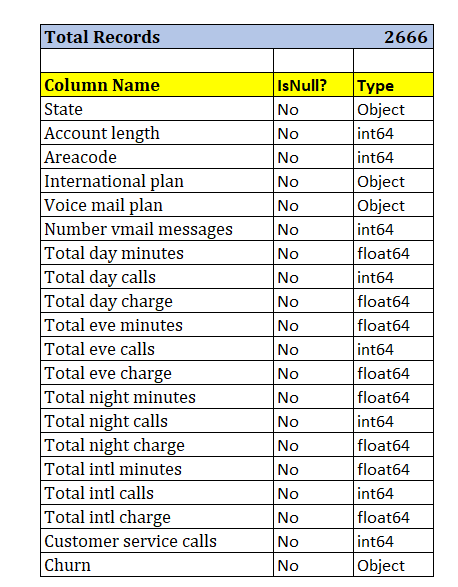

## 2. Exploratory Data Anlysis

In [5]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [7]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [8]:
df["Churn"].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [9]:
# Make a dropdown to select the Area, or "All"
area = widgets.Dropdown(
    options=['All'] + list(df['State'].unique()),
    value='All',
    description='State:',
)

criteria_list=["Top five with highest churn state","Top five with lowest churn state"]
criteria = widgets.Dropdown(
    options= criteria_list,
    value='Top five with highest churn state',
    description='Select criteria:',
)

intl_plan = widgets.Dropdown(
    options=list(df['International plan'].unique()),
    value='Yes',
    description='Intl Plan?:',
)

In [10]:
# Function 
def cust_service_call_churn(call_val):    
    ax=df[df['Customer service calls']==call_val].groupby('Churn').count()['State'].plot(kind='bar', 
                                stacked=True, title="Churn Analysis Based on # of Customer Service Calls")
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()/2))

In [11]:
interact(cust_service_call_churn, call_val= widgets.IntSlider(value=1, 
                        min=df["Customer service calls"].min(), max=df["Customer service calls"].max(), 
                                                              step=1,description="# of Service Calls"))

interactive(children=(IntSlider(value=1, description='# of Service Calls', max=9), Output()), _dom_classes=('w…

<function __main__.cust_service_call_churn(call_val)>

In [12]:
#Function to plot churn based on State
def plot_state_churn(area):
    if(area=="All"):
        plt.figure(figsize=(12,8))
        df.groupby("State")["Churn"].count().plot(kind='bar', stacked=True, title="Area = {}".format(area))
       # df.groupby(['State']).count().plot(kind='bar', title="Area = {}".format(area))
    else:
        df_state_churn=df[df.State==area]["Churn"]
#         df_state_churn=df[(df.State=="WV") & (df.Churn==True)]["Churn"]
        ax=sns.countplot(df_state_churn)
        plt.title("Churn status for: "+area)
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()/2))


In [13]:
interactive(plot_state_churn, area=area)

interactive(children=(Dropdown(description='State:', options=('All', 'KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO',…

In [14]:
# function to draw churn based on below criteria:
# 1. Top five with highest churn state
# 2. Downmost five with lowest churn state
def plot_criteria_churn(criteria):
    #ax
    if(criteria=='Top five with highest churn state'):
#         print(criteria)
          ax=df[df.Churn==True].groupby("State").count()["Churn"].sort_values(ascending=False).head(5).plot(kind='bar', stacked=True, title="{}".format(criteria))
    elif(criteria=='Top five with lowest churn state'):
          ax=df[df.Churn==True].groupby("State").count()["Churn"].sort_values(ascending=False).tail(5).plot(kind='bar', stacked=True, title="{}".format(criteria))
            
    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()/2))

        

In [15]:
interactive(plot_criteria_churn,criteria=criteria)

interactive(children=(Dropdown(description='Select criteria:', options=('Top five with highest churn state', '…

In [16]:
# function to draw Churn plot based on Internation Plan opted or not by customer
def plot_intlplan_churn(intl_plan):
    df_Yes_intplan=df[df["International plan"]==intl_plan]["Churn"]
    ax=sns.countplot(df_Yes_intplan)

    for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()/2))

        

In [17]:
interactive(plot_intlplan_churn,intl_plan=intl_plan)

interactive(children=(Dropdown(description='Intl Plan?:', index=1, options=('No', 'Yes'), value='Yes'), Output…

## 3. Modeling

In [18]:
def encode_state(df,col_name):
    state_count_dict=dict(df[col_name].value_counts())
    total_count=df[col_name].value_counts().sum()
    satate_wieght_dict={}
    for eachState in state_count_dict:
        satate_wieght_dict[eachState]=round(state_count_dict[eachState]/total_count,3)
    return satate_wieght_dict

In [19]:
satate_wieght_dict=encode_state(df,"State")

In [20]:
df_test_state_weight_dict=encode_state(df_test,"State")

In [21]:
df["State"]=df["State"].apply(lambda x:satate_wieght_dict[x])

In [22]:
df_test["State"]=df_test["State"].apply(lambda x:df_test_state_weight_dict[x])

In [23]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0  0.020             128        415                 No             Yes   
1  0.025             107        415                 No             Yes   
2  0.019             137        415                 No              No   
3  0.025              84        408                Yes              No   
4  0.020              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [24]:
dummied=pd.get_dummies(df[["International plan","Voice mail plan"]],drop_first=True)

In [25]:
dummied_test=pd.get_dummies(df_test[["International plan","Voice mail plan"]],drop_first=True)

In [26]:
df=pd.concat([df,dummied],axis=1)

In [27]:
df_test=pd.concat([df_test,dummied_test],axis=1)

In [28]:
y=df["Churn"]
X=df.drop("Churn",axis=1)

In [29]:
y.value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [30]:
y_test=df_test["Churn"]
X_test=df_test.drop("Churn",axis=1)


In [31]:
X=X.drop(["International plan","Voice mail plan"],axis=1)

In [32]:
X_test=X_test.drop(["International plan","Voice mail plan"],axis=1)

In [33]:
std_sclr=StandardScaler()
x_scaled=pd.DataFrame(std_sclr.fit_transform(X),columns=X.columns)

#X_test_scaled=pd.DataFrame(std_sclr.tra())

In [34]:
X_test_scaled=pd.DataFrame(std_sclr.transform(X_test))

In [35]:
dumm_classifier=DummyClassifier()

In [36]:
dummy_model=dumm_classifier.fit(x_scaled,y)

In [37]:
dummy_model_predict=dummy_model.predict(X_test)

In [38]:
print(classification_report(y_pred=dummy_model_predict,y_true=y_test))

              precision    recall  f1-score   support

       False       0.86      0.88      0.87       572
        True       0.17      0.15      0.16        95

    accuracy                           0.78       667
   macro avg       0.52      0.52      0.52       667
weighted avg       0.76      0.78      0.77       667



In [39]:
print(confusion_matrix(y_pred=dummy_model_predict,y_true=y_test))

[[506  66]
 [ 81  14]]


In [40]:
log_reg=LogisticRegression()
knn_model=KNeighborsClassifier(n_neighbors=11)
rndm_frst_model=RandomForestClassifier(n_estimators=100)
naive_bayes_model=GaussianNB()
svc_model=SVC()

In [41]:
cross_val_score(log_reg,X=x_scaled,y=y,scoring="f1_weighted",cv=10).mean()

0.8344342526409732

In [42]:
cross_val_score(knn_model,X=x_scaled,y=y,scoring="f1_weighted",cv=10).mean()

0.8482752230189858

In [43]:
cross_val_score(rndm_frst_model,X=x_scaled,y=y,scoring="f1_weighted",cv=10).mean()

0.9512165402300733

In [44]:
cross_val_score(naive_bayes_model,X=x_scaled,y=y,scoring="f1_weighted",cv=10).mean()

0.8601832525216697

In [45]:
cross_val_score(svc_model,X=x_scaled,y=y,scoring="f1_weighted",cv=10).mean()

0.8949360084553645

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
rf_random = RandomizedSearchCV(estimator = rndm_frst_model, param_distributions = random_grid, 
                               n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1,error_score="f1_weighted")
# Fit the random search model
rf_random.fit(x_scaled, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.9min finished


RandomizedSearchCV(cv=10, error_score='f1_weighted',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
      

In [50]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [51]:
rf_random.best_score_

0.9561140285071268

In [52]:
y_rndm_frst_predict=rf_random.predict(X_test_scaled)

In [53]:
print(classification_report(y_pred=y_rndm_frst_predict,y_true=y_test))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       572
        True       0.93      0.71      0.80        95

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



In [54]:
pd.crosstab(y_test,y_rndm_frst_predict)

col_0  False  True 
Churn              
False    567      5
True      28     67

In [55]:
pd.crosstab(y_rndm_frst_predict,y_test)

Churn  False  True 
row_0              
False    567     28
True       5     67

In [46]:
final_randm_frst_model=RandomForestClassifier(n_estimators=800,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=100,bootstrap=True)


In [47]:
final_randm_frst_model.fit(x_scaled,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
final_model_predicted_value=final_randm_frst_model.predict(X_test_scaled)

## 4. Model Evaluation

In [49]:
print(classification_report(y_pred=final_model_predicted_value,y_true=y_test))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       572
        True       0.96      0.72      0.82        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



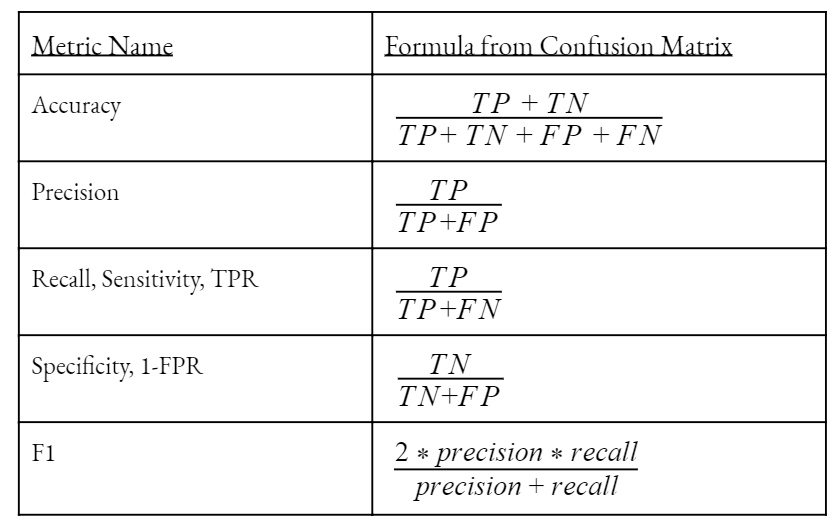

In [50]:
confusion_mat_df=pd.DataFrame(confusion_matrix(y_pred=final_model_predicted_value,y_true=y_test),
                              index=["Actual False","Actual True"],columns=["Predicted False","Predicted True"])
confusion_mat_df

Predicted False  Predicted True
Actual False              569               3
Actual True                27              68

In [51]:
f1_Score=f1_score(y_pred=final_model_predicted_value,y_true=y_test)
print(f1_Score)

0.8192771084337349


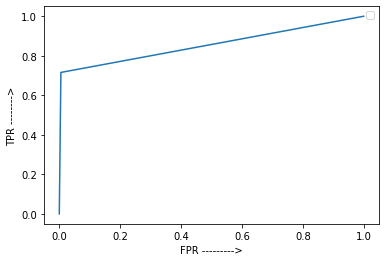

In [52]:
# from sklearn.metr import roc
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc_score=roc_auc_score(y_score=final_model_predicted_value,y_true=y_test)
tpr,fpr,threshold=roc_curve(y_score=final_model_predicted_value,y_true=y_test)
# print(tpr,fpr,threshold)
plt.legend("The area under curve {0}".format(roc_auc_score))
plt.xlabel("FPR --------->")
plt.ylabel("TPR -------->")
plt.plot(tpr,fpr)
plt.show()

In [53]:
ns_probs = [0 for _ in range(len(y_test))]
#dummy_model_predict *= 1
#y_test *= 1

ns_auc = roc_auc_score(y_score=dummy_model_predict,y_true=y_test)
lr_auc = roc_auc_score(y_score=final_model_predicted_value,y_true=y_test)
# summarize scores
print('Dummy Classifier: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, dummy_model_predict)
lr_fpr, lr_tpr, _ = roc_curve(y_test, final_model_predicted_value)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(loc="best")

# show the plot
plt.show()

TypeError: 'numpy.float64' object is not callable

## 5. Conclusion

- The customer churn rate increases with # of customer service calls. A self-service option can be thought about like portal, SMS and WhatsApp mode to raise grievances.
- Few states like Texas and Maryland has highest number of churn so plans and services can be improved in this area.
- Few states like Hawaii, Rhodes Island where churn is very low. Company can study about the customer behavior and try to generalize it across.
- Customers having International Plan churn more. So Company can seriously look into their International Plan’s relevancy and improve that.

